In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/ML_lat1'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import chardet
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns


In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif

plt.style.use("seaborn-v0_8-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

In [4]:
import matplotlib.pyplot as plt

print(plt.style.available)  # Menampilkan daftar style yang tersedia


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [5]:
with open("C:/Users/LENOVO/Documents/ML_lat1/2023-2024 NBA Player Stats - Regular.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000000))

# check what the character encoding might be
print(result)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [6]:
df = pd.read_csv("C:/Users/LENOVO/Documents/ML_lat1/2023-2024 NBA Player Stats - Regular.csv", encoding="Windows-1252", delimiter=";")

In [7]:
df.head(8)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF-C,24,TOT,74,18,21.9,3.2,6.3,...,0.616,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6
1,1,Precious Achiuwa,C,24,TOR,25,0,17.5,3.1,6.8,...,0.571,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7
2,1,Precious Achiuwa,PF,24,NYK,49,18,24.2,3.2,6.1,...,0.643,2.9,4.3,7.2,1.1,0.6,1.1,1.1,2.1,7.6
3,2,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,...,0.755,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3
4,3,Ochai Agbaji,SG,23,TOT,78,28,21.0,2.3,5.6,...,0.661,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8
5,3,Ochai Agbaji,SG,23,UTA,51,10,19.7,2.1,4.9,...,0.750,0.7,1.8,2.5,0.9,0.5,0.6,0.7,1.3,5.4
6,3,Ochai Agbaji,SG,23,TOR,27,18,23.6,2.7,6.8,...,0.611,1.4,1.9,3.3,1.3,0.7,0.6,1.1,1.9,6.7
7,4,Santi Aldama,PF,23,MEM,61,35,26.5,4.0,9.3,...,0.621,1.2,4.6,5.8,2.3,0.7,0.9,1.1,1.5,10.7


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      735 non-null    int64  
 1   Player  735 non-null    object 
 2   Pos     735 non-null    object 
 3   Age     735 non-null    int64  
 4   Tm      735 non-null    object 
 5   G       735 non-null    int64  
 6   GS      735 non-null    int64  
 7   MP      735 non-null    float64
 8   FG      735 non-null    float64
 9   FGA     735 non-null    float64
 10  FG%     735 non-null    float64
 11  3P      735 non-null    float64
 12  3PA     735 non-null    float64
 13  3P%     735 non-null    float64
 14  2P      735 non-null    float64
 15  2PA     735 non-null    float64
 16  2P%     735 non-null    float64
 17  eFG%    735 non-null    float64
 18  FT      735 non-null    float64
 19  FTA     735 non-null    float64
 20  FT%     735 non-null    float64
 21  ORB     735 non-null    float64
 22  DR

In [9]:
import matplotlib.pyplot as plt

# Menampilkan daftar colormap yang tersedia
print(plt.colormaps())


['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', '

In [10]:
import seaborn as sns

df.describe().T.style.background_gradient(cmap="coolwarm")  # Pilih colormap yang tersedia


,count,mean,std,min,25%,50%,75%,max
Rk,735.000000,282.209524,166.858903,1.000000,140.500000,290.000000,423.500000,572.000000
Age,735.000000,26.155102,4.371745,19.000000,23.000000,25.000000,29.000000,39.000000
G,735.000000,40.880272,25.581293,1.000000,17.000000,41.000000,64.500000,84.000000
GS,735.000000,18.440816,25.024108,0.000000,0.000000,5.000000,29.000000,82.000000
MP,735.000000,18.264762,9.735524,0.500000,10.600000,17.200000,26.450000,37.800000
FG,735.000000,2.972789,2.356999,0.000000,1.300000,2.300000,4.150000,11.500000
FGA,735.000000,6.423401,4.783384,0.000000,3.000000,5.000000,8.700000,23.600000
FG%,735.000000,0.442687,0.119501,0.000000,0.400000,0.446000,0.500000,0.800000
3P,735.000000,0.909116,0.848969,0.000000,0.200000,0.700000,1.400000,4.800000
3PA,735.000000,2.582449,2.166629,0.000000,0.900000,2.100000,3.700000,11.800000


In [11]:
df.select_dtypes(include=['number']).corr().style.background_gradient(cmap="coolwarm")


,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,1.000000,-0.028506,-0.010414,-0.068715,-0.068304,-0.053631,-0.051257,0.004643,-0.027403,-0.031100,0.056766,-0.055867,-0.053495,-0.005063,0.021636,-0.072356,-0.076711,-0.026276,-0.029998,-0.035754,-0.035809,-0.015419,-0.022229,-0.057236,-0.046027,0.006844,-0.057267
Age,-0.028506,1.000000,0.082762,0.070683,0.145436,0.069190,0.070429,0.031799,0.151919,0.125395,0.099032,0.018160,0.019243,-0.003744,0.092592,0.049426,0.032121,0.069006,-0.029733,0.082875,0.052871,0.155382,0.118508,0.004767,0.035622,0.099589,0.080390
G,-0.010414,0.082762,1.000000,0.669234,0.647642,0.576278,0.557685,0.342914,0.500696,0.474267,0.318989,0.497425,0.491197,0.274340,0.392526,0.441692,0.448322,0.416871,0.318166,0.530870,0.497912,0.451469,0.410858,0.339533,0.487952,0.555573,0.573829
GS,-0.068715,0.070683,0.669234,1.000000,0.804975,0.792599,0.771083,0.254235,0.582774,0.571439,0.191885,0.732726,0.732907,0.174998,0.259535,0.672103,0.677231,0.273393,0.391392,0.698510,0.647365,0.636445,0.551259,0.460361,0.699515,0.614760,0.787787
MP,-0.068304,0.145436,0.647642,0.804975,1.000000,0.889265,0.894982,0.312370,0.724300,0.731173,0.313735,0.790680,0.807079,0.250399,0.353272,0.725813,0.728806,0.407725,0.439226,0.784444,0.726708,0.748207,0.745287,0.467709,0.812380,0.781139,0.886992
FG,-0.053631,0.069190,0.576278,0.792599,0.889265,1.000000,0.978061,0.351937,0.692578,0.691093,0.271628,0.944863,0.952250,0.252613,0.343880,0.869781,0.872293,0.352708,0.411551,0.777107,0.712659,0.761142,0.636538,0.430703,0.869197,0.656190,0.992322
FGA,-0.051257,0.070429,0.557685,0.771083,0.894982,0.978061,1.000000,0.223886,0.772895,0.791656,0.293345,0.880964,0.918338,0.164515,0.247146,0.855057,0.845747,0.366049,0.304945,0.710945,0.629338,0.782743,0.647741,0.345377,0.872416,0.622276,0.983970
FG%,0.004643,0.031799,0.342914,0.254235,0.312370,0.351937,0.223886,1.000000,0.044151,-0.025145,0.182432,0.422318,0.337130,0.782175,0.926779,0.245676,0.282252,0.266321,0.477933,0.421734,0.466891,0.160834,0.196413,0.418596,0.247427,0.393790,0.311317
3P,-0.027403,0.151919,0.500696,0.582774,0.724300,0.692578,0.772895,0.044151,1.000000,0.979770,0.491828,0.418926,0.471509,0.066751,0.253213,0.534077,0.487624,0.386072,-0.082536,0.372772,0.252915,0.607008,0.514615,0.083686,0.590574,0.421713,0.741704
3PA,-0.031100,0.125395,0.474267,0.571439,0.731173,0.691093,0.791656,-0.025145,0.979770,1.000000,0.423912,0.425968,0.485350,0.050889,0.167253,0.543737,0.497950,0.382681,-0.091009,0.370128,0.248337,0.617236,0.531996,0.071730,0.610290,0.421793,0.739904


In [12]:
df.describe(include=object)

,Player,Pos,Tm
count,735,735,735
unique,572,12,31
top,Mike Muscala,SF,TOT
freq,4,155,78


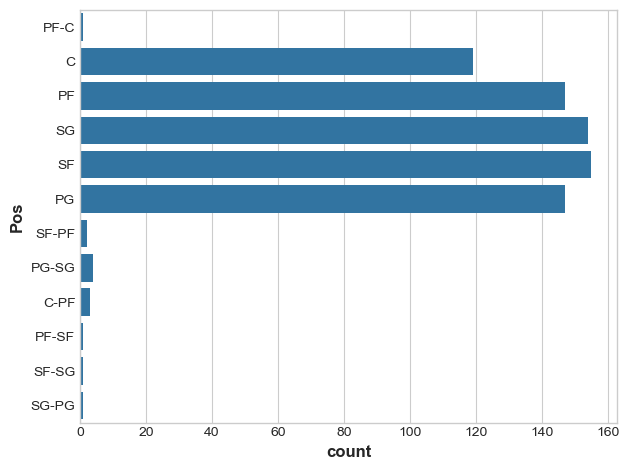

In [13]:
sns.countplot(df['Pos'],label="Count")
plt.show()

In [14]:
df = df.drop(columns=['Rk','Player'])

In [15]:
duplicate = df[df.duplicated()]
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS


In [16]:
X = df.drop('Pos', axis=1)
y = df['Pos']

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# list discrete features that have integer dtypes for using MI (Mutual Information)
discrete_features = X.dtypes == int

In [17]:
#use mutual information classify to select mutual feature
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores  # show a few features with their MI scores

c:\Users\LENOVO\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\LENOVO\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\LENOVO\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\LENOVO\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\LENOVO\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.Crea

FG%     0.158958
ORB     0.156248
2P%     0.152991
3PA     0.120184
TRB     0.106720
BLK     0.106196
AST     0.089046
3P      0.086050
eFG%    0.073387
G       0.061102
STL     0.054768
DRB     0.052830
3P%     0.038157
FGA     0.029826
Age     0.026208
FT%     0.020167
FT      0.016633
2PA     0.016322
PF      0.010196
FG      0.005527
FTA     0.003024
GS      0.000317
Tm      0.000000
2P      0.000000
MP      0.000000
TOV     0.000000
PTS     0.000000
Name: MI Scores, dtype: float64

In [18]:
def drop_uninformative(df, mi_scores):
    return df.loc[:, mi_scores > 0.05]

X = drop_uninformative(X, mi_scores)

In [19]:
#Cluster the dataset to create new feature
kmeans = KMeans(n_clusters=5)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [20]:
X

,G,FG%,3P,3PA,2P%,eFG%,ORB,DRB,TRB,AST,STL,BLK,Cluster
0,74,0.501,0.4,1.3,0.562,0.529,2.6,4.0,6.6,1.3,0.6,0.9,1
1,25,0.459,0.5,1.9,0.528,0.497,2.0,3.4,5.4,1.8,0.6,0.5,3
2,49,0.525,0.3,1.0,0.578,0.547,2.9,4.3,7.2,1.1,0.6,1.1,2
3,71,0.521,0.2,0.6,0.528,0.529,2.2,8.1,10.4,3.9,1.1,0.9,1
4,78,0.411,0.8,2.7,0.523,0.483,0.9,1.8,2.8,1.1,0.6,0.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,10,0.524,0.0,0.1,0.550,0.524,1.7,1.1,2.8,0.7,0.5,0.2,0
731,54,0.430,3.2,8.7,0.479,0.516,0.4,2.3,2.8,10.8,1.3,0.2,4
732,48,0.538,0.1,0.5,0.588,0.552,1.5,2.8,4.3,0.6,0.2,0.4,2
733,43,0.419,0.0,0.1,0.424,0.427,1.1,1.5,2.6,0.9,0.2,0.1,2


In [21]:
from sklearn.tree import DecisionTreeClassifier as dtc

decision_tree = dtc(random_state=0)
decision_tree.fit(X,y)

predict = cross_val_predict(estimator = decision_tree, X = X, y = y, cv = 10)
print("Classification Report: \n",classification_report(y, predict))

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Classification Report: 
               precision    recall  f1-score   support

           C       0.50      0.55      0.52       119
        C-PF       0.00      0.00      0.00         3
          PF       0.27      0.25      0.26       147
        PF-C       0.00      0.00      0.00         1
       PF-SF       0.00      0.00      0.00         1
          PG       0.52      0.52      0.52       147
       PG-SG       0.00      0.00      0.00         4
          SF       0.33      0.35      0.34       155
       SF-PF       0.00      0.00      0.00         2
       SF-SG       0.00      0.00      0.00         1
          SG       0.36      0.31      0.33       154
       SG-PG       0.00      0.00      0.00         1

    accuracy                           0.38       735
   macro avg       0.17      0.16      0.16       735
weighted avg       0.38      0.38      0.38       735



c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [22]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state = 0)
random_forest.fit(X, y)
predict = cross_val_predict(estimator = random_forest, X = X, y = y, cv = 10)
print("Classification Report: \n",classification_report(y, predict))

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Classification Report: 
               precision    recall  f1-score   support

           C       0.67      0.66      0.66       119
        C-PF       0.00      0.00      0.00         3
          PF       0.34      0.33      0.34       147
        PF-C       0.00      0.00      0.00         1
       PF-SF       0.00      0.00      0.00         1
          PG       0.66      0.65      0.66       147
       PG-SG       0.00      0.00      0.00         4
          SF       0.39      0.45      0.42       155
       SF-PF       0.00      0.00      0.00         2
       SF-SG       0.00      0.00      0.00         1
          SG       0.41      0.40      0.40       154
       SG-PG       0.00      0.00      0.00         1

    accuracy                           0.48       735
   macro avg       0.21      0.21      0.21       735
weighted avg       0.48      0.48      0.48       735



c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X,y)
predict = cross_val_predict(estimator = knn, X = X, y = y, cv = 10)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           C       0.47      0.55      0.51       119
        C-PF       0.00      0.00      0.00         3
          PF       0.24      0.29      0.27       147
        PF-C       0.00      0.00      0.00         1
       PF-SF       0.00      0.00      0.00         1
          PG       0.45      0.44      0.44       147
       PG-SG       0.00      0.00      0.00         4
          SF       0.29      0.28      0.28       155
       SF-PF       0.00      0.00      0.00         2
       SF-SG       0.00      0.00      0.00         1
          SG       0.38      0.31      0.34       154
       SG-PG       0.00      0.00      0.00         1

    accuracy                           0.36       735
   macro avg       0.15      0.16      0.15       735
weighted avg       0.36      0.36      0.36       735



c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labe